In [3]:
import math
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
def elipse(a, b, t, x0, y0, k):
  x = a * math.cos(t) + x0
  y = b * math.sin(t) + y0
  return x, y, k

def parabole(p, t, x0, y0):
  x=t*t/(2*p)+x0
  y=t+y0
  return x, y, 2

In [31]:
X1 = []

for i in range(60):
  t = random.uniform(0, 2 * math.pi)
  X1.append(elipse(0.4, 0.4, t, -0.1, 0.15, 0))

for i in range(100):
  t = random.uniform(0, 2 * math.pi)
  X1.append(elipse(0.7, 0.7, t, 0, 0, 1))

for i in range(120):
  t = random.uniform(0, 2 * math.pi)
  X1.append(parabole(-1, t, 0.8, 0))

In [32]:
df = pd.DataFrame(X1, columns =['x', 'y', 'class'])

In [33]:
df = shuffle(df)

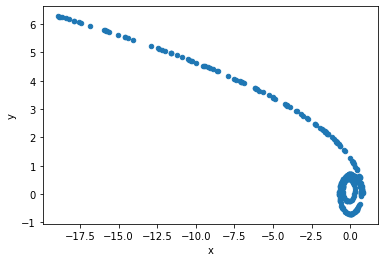

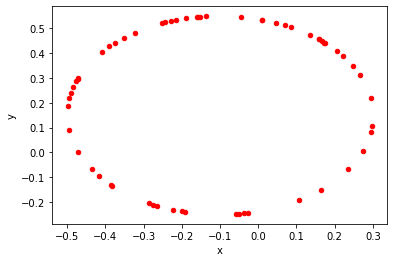

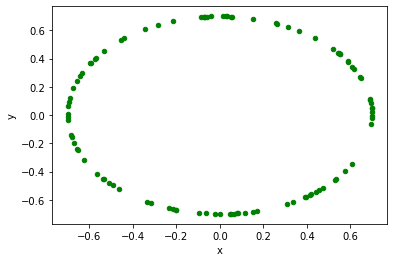

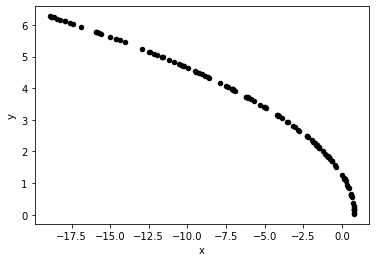

In [34]:
df.plot.scatter(x="x", y="y");
df[df['class'] == 0].plot.scatter(x="x", y="y", color = 'red');
df[df['class'] == 1].plot.scatter(x="x", y="y", color = 'green');
df[df['class'] == 2].plot.scatter(x="x", y="y", color = 'black');

In [35]:
df['class'] = df['class'].map({0: np.array([0, 0]), 1: np.array([0, 1]), 2: np.array([1, 0])})
print(df.head())

            x         y   class
9   -0.374664  0.440792  [0, 0]
267 -7.026720  3.956443  [1, 0]
143  0.438395  0.545719  [0, 1]
212  0.443048  0.844928  [1, 0]
227  0.245251  1.053327  [1, 0]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df[['x', 'y']], df['class'], test_size=0.3, random_state=42)

X_control, X_test, y_control, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [37]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
for t in range(len(y_train)):
  y_train[t] = np.array(y_train[t])

In [38]:
class Classificator(object):
  def __init__(self, class_count = 2, eps = 0.00001, iter = 1500):
    self.epsilon = eps
    self.iterations = iter
    self.k = class_count
    np.random.seed(42)
    self.th = np.zeros(self.k)
    self.n1 = 0.5 #https://basegroup.ru/community/articles/rprop
    self.n2 = 1.2
    self.d_max = 50
    self.d_min = 1.0E-6
    self.d = np.zeros(self.k)
    self.last_error = np.zeros(self.k)
    for i in range(self.k):
      self.d[i] = 0.1
  
  def sigmoid(self,x):
    return 1 / (1 + math.exp(-1 * x))

  def predict_proba(self, X):
    t = []
    for u in range(self.k):
      s = np.dot(X,self.w[u]) + self.th[u]
      t.append(self.sigmoid(s))
    return np.array(t)

  def predict(self, X):
    t = []
    for u in range(self.k):
      s = np.dot(X,self.w[u]) + self.th[u]
      t.append(self.sigmoid(s) >= 0.5)
    return np.array(t)
  
  def check(self, r, j):
      if r * self.last_error[j] > 0:
        self.d[j] = self.d[j] * self.n2
      else:
        if r * self.last_error[j] < 0:
          self.d[j] = self.d[j] * self.n1

      if (self.d[j] > self.d_max):
          return self.d_max
      else:
          if (self.d[j] < self.d_min):
             return self.d_min
      return self.d[j]
  
  def fit(self, X, y):
      self.w = np.random.rand(self.k, X.shape[1])
      loss = []
      for i in range(self.iterations):
        l = []
        for xi, yi in zip(X, y):
          pred = self.predict_proba(xi)
          l.append(pred)
          for j in range(self.k):
            if abs(pred[j] - yi[j]) > self.epsilon:
              if pred[j] - yi[j] > 0:
                self.w[j] -= self.d[j]
              else:
                self.w[j] += self.d[j]
              self.d[j] = self.check(pred[j] - yi[j], j)
              self.last_error[j] = pred[j] - yi[j]
        k = 0
        for t in range(len(y)):
          k += mean_squared_error(y[t], l[t])
        loss.append(k/len(y))
      return loss

In [39]:
cl = Classificator()

In [40]:
l = cl.fit(X_train, y_train)

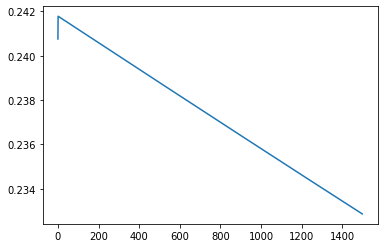

In [41]:
plt.plot(l)

In [42]:
pred = []
for x in X_train:
  pred.append(cl.predict(x))

In [43]:
from sklearn.metrics import accuracy_score
k = 0
for t in range(len(pred)):
  k += accuracy_score(y_train[t], pred[t])
print(k / len(pred))

0.5382653061224489


In [44]:
X_control = X_control.to_numpy()
y_control = y_control.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [45]:
pred = []
for x in X_control:
  pred.append(cl.predict(x))

In [46]:
for t in range(len(y_control)):
  y_control[t] = np.array(y_control[t])

In [47]:
k = 0
for t in range(len(pred)):
  k += accuracy_score(y_control[t], pred[t])
print(k / len(pred))

0.6785714285714286


In [48]:
pred = []
for x in X_test:
  pred.append(cl.predict(x))

In [49]:
for t in range(len(y_test)):
  y_test[t] = np.array(y_test[t])

In [50]:
k = 0
for t in range(len(pred)):
  k += accuracy_score(y_test[t], pred[t])
print(k / len(pred))

0.5892857142857143


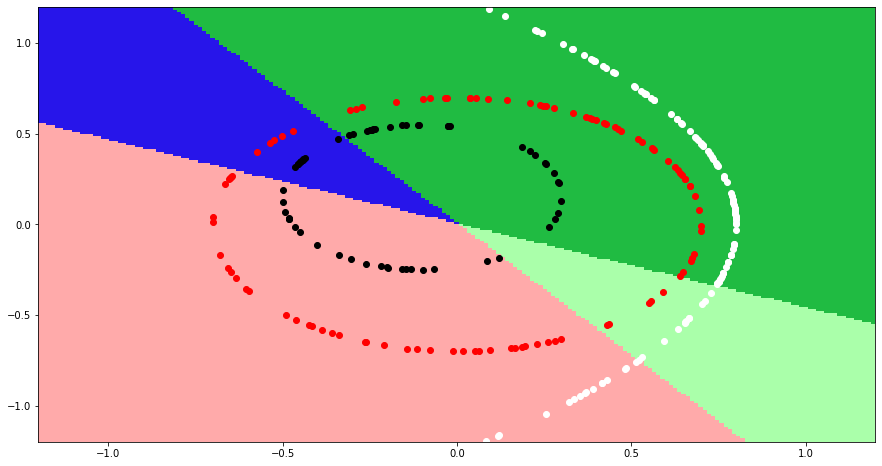

In [51]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))
eps = 0.1
xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, 200),
                     np.linspace(-1.2, 1.2, 200))
F = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([])
for f in F:
  s = cl.predict(f)
  if s[0] == 0:
    if s[1] == 0:
      s = 0
    else:
      s = 1
  else:
    if s[1] == 0:
      s = 2
    else:
      s = 3
  Z = np.append(Z, s)
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#2715ea', '#20bb42'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

X1 = []
Y1 = []
for i in range(60):
  t = random.uniform(0, 2 * math.pi)
  x, y, k = elipse(0.4, 0.4, t, -0.1, 0.15, 0)
  X1.append(x)
  Y1.append(y)
plt.scatter(X1, Y1, c = "black")

X1 = []
Y1 = []
for i in range(100):
  t = random.uniform(0, 2 * math.pi)
  x, y, k = elipse(0.7, 0.7, t, 0, 0, 1)
  X1.append(x)
  Y1.append(y)
plt.scatter(X1, Y1, c = "red")

X1 = []
Y1 = []
for i in range(120):
  t = random.uniform(-1.2,1.2)
  x, y, k = parabole(-1, t, 0.8, 0)
  X1.append(x)
  Y1.append(y)
plt.scatter(X1, Y1, c = "white")
plt.show()

In [52]:
#2 часть
def x_func(t):
  return math.sin(t * t - 10 * t + 3)

h = 0.025
t = 1
Y = []
X = []
while t <= 6:
  Y.append(round(x_func(t))) #целая часть числа
  X.append(x_func(t))
  t += h

In [53]:
X = np.array(X)
Y = np.array(Y)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [516]:
class gdx_Net(object):
  def __init__(self, speed = 0.05, lr_inc = 1.05, mc = 0.9, hidden = 10, eps = 1e-8, iter = 600):
    self.epsilon = eps
    self.iterations = iter
    self.hidden = hidden
    self.lr_inc = lr_inc
    self.speed = speed
    self.mc = mc
    self.max_perf_inc = 1.04
    self.lr_dec = 0.7
    self.d = 0
    self.d_th = 0
    self.th = 0
    self.w = np.random.random_sample((hidden,))
    
  def sigmoid(self,x):
    return 1 / (1 + math.exp(-1 * x))

  def predict(self, X):
    t = np.zeros(self.hidden)

    for i in range(self.hidden):
      t[i] = self.sigmoid(X)
    s = np.dot(t,self.w.T) + self.th
    return s
  
  def fit(self, X, y):
      loss = []
      self.last_error = len(y)
      for i in range(self.iterations):
        l = []
        for xi, yi in zip(X, y):
          pred = self.predict(xi)
          l.append(pred)
          if abs(pred - yi) > self.epsilon:
              self.d = self.mc * self.d + self.mc * self.speed * xi * (pred - yi)
              self.d_th = self.mc * self.d_th + self.speed * (pred - yi)
              self.w -= self.d
              self.th -= self.d_th
          else:
            return loss
              
        er = mean_squared_error(y, l)
        if self.last_error * self.max_perf_inc < er:
          self.speed *= self.lr_dec
        if self.last_error > er:
          self.speed *= self.lr_inc
        self.last_error = er
        loss.append(self.last_error)
      return loss

In [517]:
gd = gdx_Net()
loss = gd.fit(X_train, y_train)

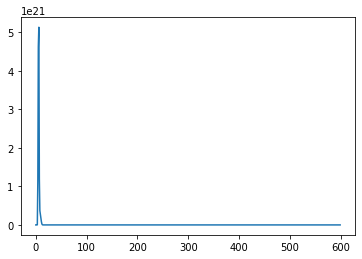

In [518]:
plt.plot(loss)

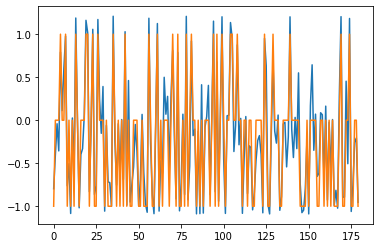

In [519]:
pred = []
for x in X_train:
  pred.append(gd.predict(x))
plt.plot(pred)
plt.plot(y_train)

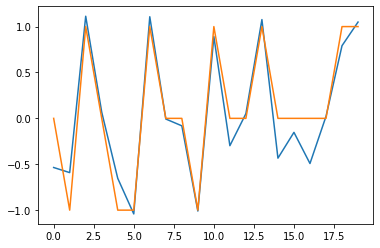

In [520]:
pred = []
for x in X_test:
  pred.append(gd.predict(x))
plt.plot(pred)
plt.plot(y_test)

In [379]:
from sklearn.neural_network import MLPRegressor
r = MLPRegressor(learning_rate= 'adaptive', hidden_layer_sizes=(10,), learning_rate_init = 0.05, momentum = 0.9, max_iter = 600, solver = 'sgd', activation = 'logistic')

In [444]:
loss = r.fit(X_train.reshape(-1, 1), y_train)
r.score(X_train.reshape(-1, 1), y_train)

0.8737892647592529

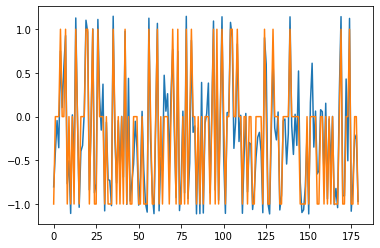

In [445]:
pred = r.predict(X_train.reshape(-1, 1))
plt.plot(pred)
plt.plot(y_train)

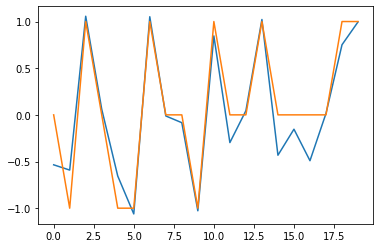

In [446]:
pred = r.predict(X_test.reshape(-1, 1))
plt.plot(pred)
plt.plot(y_test)

In [447]:
print(r.score(X_test.reshape(-1, 1), y_test))

0.8753306172331937


In [220]:
class oss_Net(object):
  def __init__(self, eps = 1e-8, iter = 3):
    self.epsilon = eps
    self.iterations = iter
    self.speed = 0.01
    self.last_w = np.random.rand()
    self.d_th = 0
    self.th = 0
    self.w = np.random.rand()
    
  def sigmoid(self,x):
    return 1 / (1 + math.exp(-1 * x))

  def predict(self, X):
    t = self.sigmoid(X)
    s = t * self.w + self.th
    return s
  
  def fit(self, X, y):
      loss = []
      self.last_predict = X[0] * self.last_w + self.th
      for i in range(self.iterations):
        l = []
        for xi, yi in zip(X, y):
          pred = self.predict(xi)
          l.append(pred)
          if abs(pred - yi) > self.epsilon:
              self.d = pred * (self.w - self.last_w) / (pred - self.last_predict + self.epsilon)
              self.last_predict = pred
              self.last_w = self.w
              self.d_th = self.speed * (pred - yi)
              self.w -= self.d
              self.th -= self.d_th
          else:
            return loss
        loss.append(mean_squared_error(y, l))
      return loss

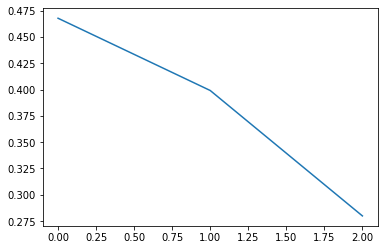

In [221]:
snet = oss_Net()
loss = snet.fit(X_train, y_train)
plt.plot(loss)

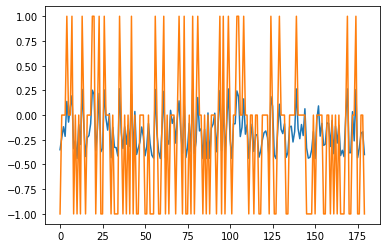

In [222]:
pred = []
for x in X_train:
  pred.append(snet.predict(x))
plt.plot(pred)
plt.plot(y_train)

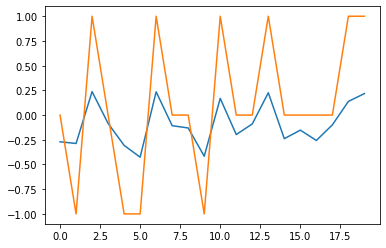

In [223]:
pred = []
for x in X_test:
  pred.append(snet.predict(x))
plt.plot(pred)
plt.plot(y_test)